<a href="https://colab.research.google.com/github/FGalvao77/Analises-estatisticas-de-dados-financeiros-com-Python-empresas-americanas/blob/main/An%C3%A1lises_estat%C3%ADsticas_de_dados_financeiros_com_Python_%7C_empresas_americanas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análises estatísticas de dados financeiros com Python | empresas americanas**

---



Para isso utilizaremos uma biblioteca chamada `yfinance`, de código aberto que usa _APIs_ disponíveis publicamente do **[Yahoo!Ⓡ finance](https://finance.yahoo.com/)** e se destina a fins educacionais e de pesquisa.

- Link da documentação da API:
 - https://pypi.org/project/yfinance/

Site de referência dos dados:
- https://finance.yahoo.com/

In [1]:
!pip install yfinance --upgrade

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
stocks = dict(
    AAPL = 'Apple Inc.',
    AMZN = 'Amazon.com, Inc.',
    CNY = 'CNY/USD - Exchange Rate',
    GDX = 'VanEck Vectors Gold Miners ETF (price)',
    GLD = 'SPDR - Gold Shares',
    GS = 'The Goldman Sachs Group, Inc.',
    INTC = 'Intel Corporation',
    MSFT = 'Microsoft Corporation',
    SPY = 'SPDR S&P 500 ETF Trust'
)

In [4]:
stocks.keys()

dict_keys(['AAPL', 'AMZN', 'CNY', 'GDX', 'GLD', 'GS', 'INTC', 'MSFT', 'SPY'])

In [5]:
df = yf.download(list(stocks))

[*********************100%***********************]  9 of 9 completed


In [6]:
df.head().round(2)

Adj Close                       ... Volume                           
                AAPL AMZN CNY GDX GLD  GS  ...    GDX GLD  GS      INTC MSFT SPY
Date                                       ...                                  
1980-03-17       NaN  NaN NaN NaN NaN NaN  ...    NaN NaN NaN  10924800  NaN NaN
1980-03-18       NaN  NaN NaN NaN NaN NaN  ...    NaN NaN NaN  17068800  NaN NaN
1980-03-19       NaN  NaN NaN NaN NaN NaN  ...    NaN NaN NaN  18508800  NaN NaN
1980-03-20       NaN  NaN NaN NaN NaN NaN  ...    NaN NaN NaN  11174400  NaN NaN
1980-03-21       NaN  NaN NaN NaN NaN NaN  ...    NaN NaN NaN  12172800  NaN NaN

[5 rows x 54 columns]

In [7]:
df.tail().round(2)

Adj Close               ...    Volume                        
                AAPL     AMZN CNY  ...      INTC        MSFT         SPY
Date                               ...                                  
2021-12-23    176.28  3421.37 NaN  ...  25189400  19611200.0  56384300.0
2021-12-27    180.33  3393.39 NaN  ...  20985400  19947000.0  56808600.0
2021-12-28    179.29  3413.22 NaN  ...  19290400  15661500.0  47274600.0
2021-12-29    179.38  3384.02 NaN  ...  14171500  15027300.0  54354300.0
2021-12-30    179.25  3394.26 NaN  ...   8864996  10146074.0  28829834.0

[5 rows x 54 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10539 entries, 1980-03-17 to 2021-12-30
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  10351 non-null  float64
 1   (Adj Close, AMZN)  6199 non-null   float64
 2   (Adj Close, CNY)   2837 non-null   float64
 3   (Adj Close, GDX)   3931 non-null   float64
 4   (Adj Close, GLD)   4309 non-null   float64
 5   (Adj Close, GS)    5704 non-null   float64
 6   (Adj Close, INTC)  10539 non-null  float64
 7   (Adj Close, MSFT)  9025 non-null   float64
 8   (Adj Close, SPY)   7284 non-null   float64
 9   (Close, AAPL)      10351 non-null  float64
 10  (Close, AMZN)      6199 non-null   float64
 11  (Close, CNY)       2837 non-null   float64
 12  (Close, GDX)       3931 non-null   float64
 13  (Close, GLD)       4309 non-null   float64
 14  (Close, GS)        5704 non-null   float64
 15  (Close, INTC)      10539 non-null  float64
 16  (Clos

In [9]:
df.isnull().sum()

Adj Close  AAPL     188
           AMZN    4340
           CNY     7702
           GDX     6608
           GLD     6230
           GS      4835
           INTC       0
           MSFT    1514
           SPY     3255
Close      AAPL     188
           AMZN    4340
           CNY     7702
           GDX     6608
           GLD     6230
           GS      4835
           INTC       0
           MSFT    1514
           SPY     3255
High       AAPL     188
           AMZN    4340
           CNY     7702
           GDX     6608
           GLD     6230
           GS      4835
           INTC       0
           MSFT    1514
           SPY     3255
Low        AAPL     188
           AMZN    4340
           CNY     7702
           GDX     6608
           GLD     6230
           GS      4835
           INTC       0
           MSFT    1514
           SPY     3255
Open       AAPL     188
           AMZN    4340
           CNY     7702
           GDX     6608
           GLD     6230
           GS   

In [10]:
for key, value in stocks.items():
    print(f'{key:6s} | {value}')

AAPL   | Apple Inc.
AMZN   | Amazon.com, Inc.
CNY    | CNY/USD - Exchange Rate
GDX    | VanEck Vectors Gold Miners ETF (price)
GLD    | SPDR - Gold Shares
GS     | The Goldman Sachs Group, Inc.
INTC   | Intel Corporation
MSFT   | Microsoft Corporation
SPY    | SPDR S&P 500 ETF Trust


In [11]:
df = df['Open'].dropna()

In [12]:
df.isnull().sum().any()

False

In [13]:
df.head().round(2)

,AAPL,AMZN,CNY,GDX,GLD,GS,INTC,MSFT,SPY
Date,,,,,,,,,
2009-01-02,3.07,51.35,39.54,33.51,85.93,84.02,14.69,19.53,90.44
2009-01-05,3.33,55.73,39.59,31.96,83.62,85.81,15.07,20.20,92.63
2009-01-06,3.43,54.55,39.61,31.83,83.37,90.05,15.09,20.75,93.64
2009-01-07,3.28,56.29,39.71,32.36,84.56,86.91,14.79,20.19,92.00
2009-01-08,3.23,54.99,39.45,30.89,84.40,83.52,14.45,19.63,90.16


In [14]:
df.tail().round(2)

,AAPL,AMZN,CNY,GDX,GLD,GS,INTC,MSFT,SPY
Date,,,,,,,,,
2020-04-03,60.70,1911.15,44.25,25.16,152.23,149.20,53.85,155.10,250.76
2020-04-06,62.72,1936.00,44.25,26.01,154.16,155.47,56.63,160.32,257.84
2020-04-07,67.70,2017.11,44.25,26.61,155.33,166.00,59.94,169.59,274.21
2020-04-08,65.68,2021.00,44.25,26.17,155.91,168.55,58.99,165.67,267.96
2020-04-09,67.18,2044.30,44.25,27.20,158.08,180.58,59.36,166.36,277.58


In [15]:
df.describe().round(2)

,AAPL,AMZN,CNY,GDX,GLD,GS,INTC,MSFT,SPY
count,2837.00,2837.00,2837.00,2837.00,2837.00,2837.00,2837.00,2837.00,2837.00
mean,26.68,654.69,41.90,32.64,126.98,173.61,31.74,55.96,189.76
std,16.38,607.16,1.58,14.05,19.85,42.96,11.84,37.46,65.07
min,2.84,48.56,38.33,12.70,79.97,63.39,12.17,15.20,67.95
25%,14.02,194.76,40.56,22.06,115.45,148.75,21.90,28.14,131.69
50%,23.95,346.30,41.67,26.39,122.57,167.83,29.16,42.17,193.73
75%,37.08,961.40,42.77,45.47,137.93,204.40,36.75,70.00,242.11
max,81.18,2173.07,49.16,66.64,184.58,274.34,67.63,190.65,337.79


In [16]:
symbol = 'AAPL'

df['min'] = df[symbol].rolling(window=20).min()
df['mean'] = df[symbol].rolling(window=20).mean()
df['std'] = df[symbol].rolling(window=20).std()
df['median'] = df[symbol].rolling(window=20).median()
df['max'] = df[symbol].rolling(window=20).max()
df['ewma'] = df[symbol].ewm(halflife=0.5, min_periods=20).mean()

In [17]:
df.dropna().head().round(2)

,AAPL,AMZN,CNY,GDX,GLD,GS,INTC,MSFT,SPY,min,mean,std,median,max,ewma
Date,,,,,,,,,,,,,,,
2009-01-30,3.31,57.36,39.69,35.54,90.70,83.59,13.45,17.74,84.98,2.84,3.17,0.16,3.2,3.43,3.31
2009-02-02,3.18,58.57,39.78,33.35,89.88,78.78,12.82,17.03,81.57,2.84,3.17,0.16,3.2,3.43,3.21
2009-02-03,3.28,60.87,40.58,33.40,89.34,84.30,13.67,17.85,83.10,2.84,3.17,0.16,3.2,3.43,3.27
2009-02-04,3.33,63.38,40.25,33.70,88.89,83.70,13.78,18.54,84.30,2.84,3.17,0.15,3.2,3.33,3.31
2009-02-05,3.31,61.15,40.30,34.90,90.75,86.77,13.65,18.51,82.70,2.84,3.17,0.15,3.2,3.33,3.31


In [18]:
df = df.dropna()

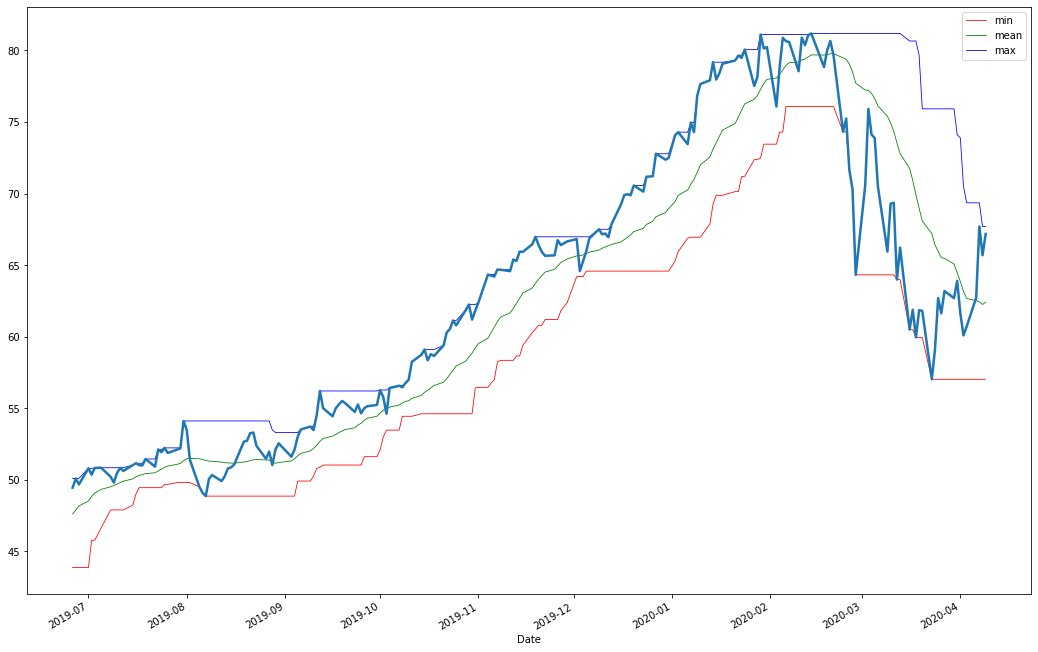

In [19]:
ax = df[['min', 'mean', 'max']].iloc[-200:].plot(
    figsize=(18,12), style=['r-', 'g-', 'b-'], 
    lw=0.8
)

df[symbol].iloc[-200:].plot(ax=ax, lw=2.5);

### **Análise técnica (Technical analysis)**
- média móvel simples (simple moving average)

In [20]:
df['SMA_1'] = df[symbol].rolling(window=7).mean()   # média móvel de 7 dias
df['SMA_2'] = df[symbol].rolling(window=15).mean()  # média móvel de 15 dias
df['SMA_3'] = df[symbol].rolling(window=30).mean()  # média móvel de 30 dias
df['SMA_4'] = df[symbol].rolling(window=90).mean()  # média móvel de 90 dias
df['SMA_5'] = df[symbol].rolling(window=180).mean() # média móvel de 180 dias
df['SMA_6'] = df[symbol].rolling(window=360).mean() # média móvel de 360 dias

In [21]:
df[[symbol, 'SMA_1', 'SMA_2', 'SMA_3', 'SMA_4', 'SMA_5', 'SMA_6']].tail().round(2)

,AAPL,SMA_1,SMA_2,SMA_3,SMA_4,SMA_5,SMA_6
Date,,,,,,,
2020-04-03,60.70,61.97,61.24,65.80,71.52,63.99,54.93
2020-04-06,62.72,62.13,61.39,65.42,71.49,64.05,54.95
2020-04-07,67.70,62.77,61.77,65.17,71.50,64.14,55.00
2020-04-08,65.68,63.20,62.16,64.97,71.49,64.22,55.03
2020-04-09,67.18,63.67,62.51,64.86,71.50,64.30,55.06


In [22]:
df.dropna(inplace=True)

In [23]:
df['SMA_1'] = df[symbol].rolling(window=42).mean()   # média móvel de 42 dias
df['SMA_2'] = df[symbol].rolling(window=252).mean()  # média móvel de 252 dias

# long position = 1; short position = 2
df['positions'] = np.where(df['SMA_1'] > df['SMA_2'], 1, -1)

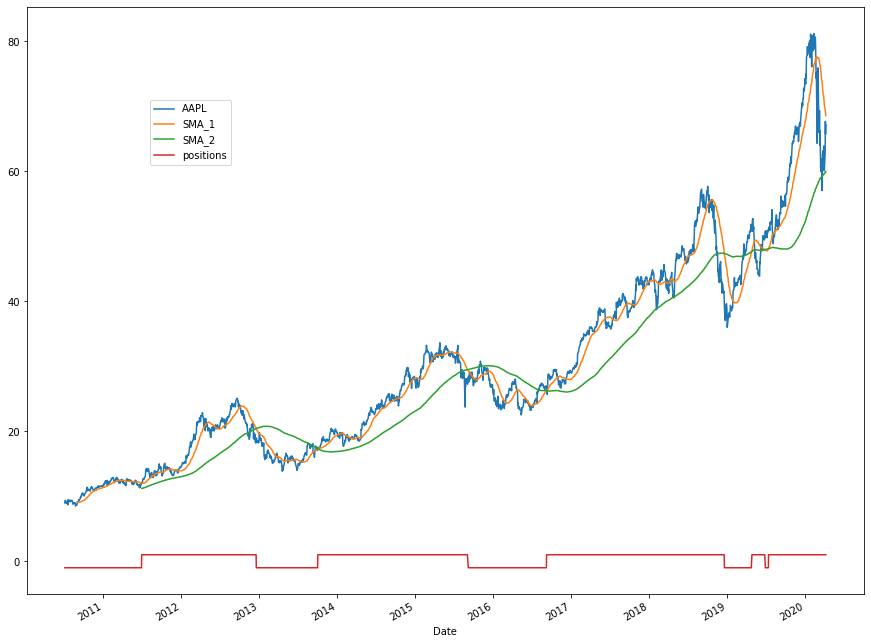

In [24]:
ax = df[[symbol, 'SMA_1', 'SMA_2', 'positions']].plot(
    figsize=(15,12), secondary_y='position'
)

ax.get_legend().set_bbox_to_anchor((0.25, 0.85));